# Labs 2

## Przygotuj program generujący następujące zbiory punktów na płaszczyźnie (współrzędne rzeczywiste typu double):
    a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100],
    b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10,
    c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),
    d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from time import perf_counter
from functools import partial
%matplotlib inline
sns.set_style('darkgrid')

# Rozwiązanie

**a) 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100]**

In [2]:
data_a = np.random.uniform(-100, 100, size = [100, 2])

In [3]:
data_a[:10]

array([[ 3.35246164e+01,  1.99773742e+01],
       [ 9.22010704e+01, -1.50756513e+01],
       [-6.84474684e+01,  1.71218249e+01],
       [-3.01280267e+01,  2.18443421e+01],
       [-6.47068348e+00, -3.49798982e+01],
       [-9.24690449e+01, -6.06081259e+01],
       [-4.93100685e-03, -9.71843060e+01],
       [-4.19115255e+01,  3.92474203e+01],
       [ 3.76515023e+01,  7.36032488e+01],
       [ 1.81282858e+01, -2.39644907e+01]])

In [4]:
df_a = pd.DataFrame(data=data_a, columns=['X', 'Y'])

In [5]:
df_a.head()

,X,Y
0,33.524616,19.977374
1,92.201070,-15.075651
2,-68.447468,17.121825
3,-30.128027,21.844342
4,-6.470683,-34.979898


In [6]:
df_a.describe()

,X,Y
count,100.000000,100.000000
mean,6.576691,-8.147083
std,58.538133,58.415628
min,-99.673758,-99.175741
25%,-42.161364,-57.127201
50%,2.758751,-9.912791
75%,59.676605,40.226176
max,99.556961,98.547716


**b) 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10**

In [7]:
data_b = [None for _ in range(100)]
for i in range(100):
    alpha = 2 * np.pi * np.random.random_sample()
    data_b[i] = (10 * np.cos(alpha), 10 * np.sin(alpha))

In [8]:
data_b[:10]

[(5.426287537454756, 8.399726397976496),
 (-7.532714501693346, -6.5770975540871195),
 (7.66813045609082, -6.418705111498143),
 (2.3436651688050043, 9.721483095522526),
 (8.397746085869272, -5.429351773210805),
 (-0.4389944361948299, -9.990359547333119),
 (7.029283706900108, 7.112606453889367),
 (-4.7161120858484615, 8.818065932715296),
 (-6.256491765909415, 7.8010454929520625),
 (7.045557487827207, 7.096486432434151)]

In [9]:
df_b = pd.DataFrame(data=data_b, columns=['X', 'Y'])

In [10]:
df_b.head()

,X,Y
0,5.426288,8.399726
1,-7.532715,-6.577098
2,7.668130,-6.418705
3,2.343665,9.721483
4,8.397746,-5.429352


In [11]:
df_b.describe()

,X,Y
count,100.000000,100.000000
mean,0.748512,0.896311
std,6.848252,7.261826
min,-9.986417,-9.990360
25%,-5.972134,-6.927660
50%,2.314816,2.432410
75%,6.939167,7.819134
max,9.990874,9.985807


**c) 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10)**

In [12]:
a = (-10, 10)
b = (-10, -10)
c = (10, -10)
d = (10, 10)

first_perimeter = abs(a[1] - b[1])
second_perimeter =  abs(b[0] - c[0])
total_range = 2 * first_perimeter + 2 * second_perimeter

# [0, 20] range - left side of the rectangle
# (20, 40] range - bottom side of the rectangle
# (40, 60] range - right side of the rectangle
# (60, 80] range - upper side of the rectangle

data_c = []
for _ in range(100):
    point = np.random.uniform(0, total_range)
    
    #left side
    if 0 <= point <= 20:
        result = (-10, point-10)
        
    # bottom side
    elif 20 < point <= 40:
        if point < 30:
            result = (point%10 - 10, -10)
        else:
            result = ((point-10) % 10, -10)
            
    # right side
    elif 40 < point <= 60:
        if point < 50:
            result = (10, point%10 - 10)
        else:
            result = (10, (point-10) % 10)
            
    # upper side
    else:
        if point < 70:
            result = (point%10 - 10, 10)
        else:
            result = ((point-10) % 10, 10)
    data_c.append(result)

In [13]:
data_c[:10]

[(10, -2.015164802008897),
 (-9.072089270376857, -10),
 (-2.64012110086383, -10),
 (10, -3.6398065897645537),
 (-10, -2.602946010662839),
 (-3.677842255074406, -10),
 (10, -2.063187552574668),
 (-10, -2.519368660122465),
 (-6.677928695574067, -10),
 (10, -5.986575543216254)]

In [14]:
df_c = pd.DataFrame(data=data_c, columns=['X', 'Y'])

In [15]:
df_c.head()

,X,Y
0,10.000000,-2.015165
1,-9.072089,-10.000000
2,-2.640121,-10.000000
3,10.000000,-3.639807
4,-10.000000,-2.602946


In [16]:
df_c.describe()

,X,Y
count,100.000000,100.000000
mean,0.651430,-0.014585
std,7.928594,8.440480
min,-10.000000,-10.000000
25%,-7.955245,-10.000000
50%,1.401578,0.049363
75%,10.000000,10.000000
max,10.000000,10.000000


**d) wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu**

In [17]:
a = (0, 0)
b = (10, 0)
c = (10, 10)
d = (0, 10)

total_range = 2 * 10

# [0, 10] range - left side of the square (X axis)
# (10, 20] range - bottom side of the square (Y axis)

# [0, 10] range - right-upper diagonal of the square
# (10, 20) range - left-upper diagonal of the square

data_d = []
for _ in range(25):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        side_result = (0, point)
    else:
        side_result = (point-10, 0)
    data_d.append(side_result)
        
for _ in range(20):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        diag_result = (point, point)
    else:
        diag_result = (point-10, 10-(point-10))
    data_d.append(diag_result)

In [18]:
data_d[:10]

[(5.564246989573983, 0),
 (3.9659449710637666, 0),
 (0, 6.02632529094574),
 (0, 9.669179412529791),
 (0, 6.09515832612582),
 (0, 4.192670701614027),
 (3.0135408739558436, 0),
 (0, 6.69023541059061),
 (9.718752888469659, 0),
 (7.799947853606561, 0)]

In [19]:
df_d = pd.DataFrame(data=data_d, columns=['X', 'Y'])

In [20]:
df_d.head()

,X,Y
0,5.564247,0.000000
1,3.965945,0.000000
2,0.000000,6.026325
3,0.000000,9.669179
4,0.000000,6.095158


In [21]:
df_d.describe()

,X,Y
count,45.000000,45.000000
mean,4.488440,3.700318
std,3.631241,3.668754
min,0.000000,0.000000
25%,0.048343,0.000000
50%,4.517419,2.938637
75%,7.799948,6.956232
max,9.890670,9.938619


---
## Uruchom wizualizację graficzną utworzonych zbiorów punktów.

**a)**

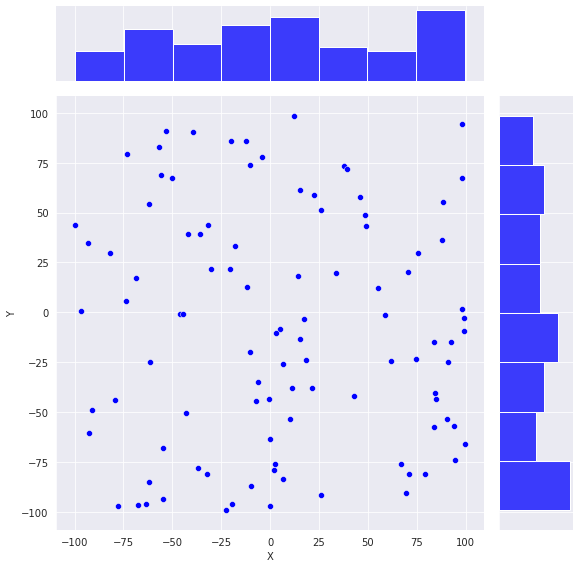

In [22]:
sns.jointplot(data=df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

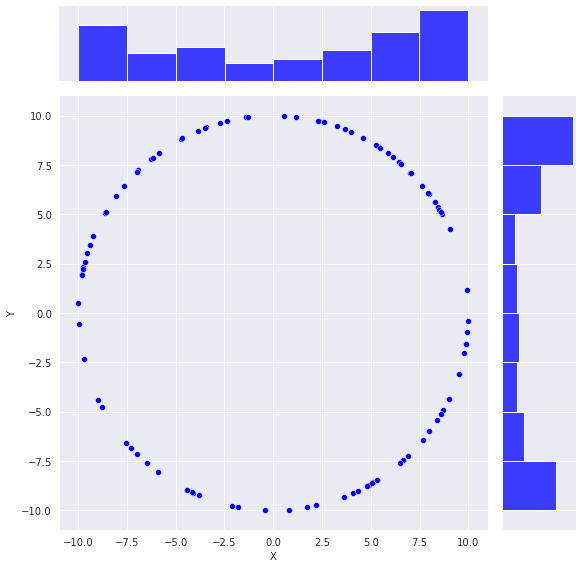

In [23]:
sns.jointplot(data=df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

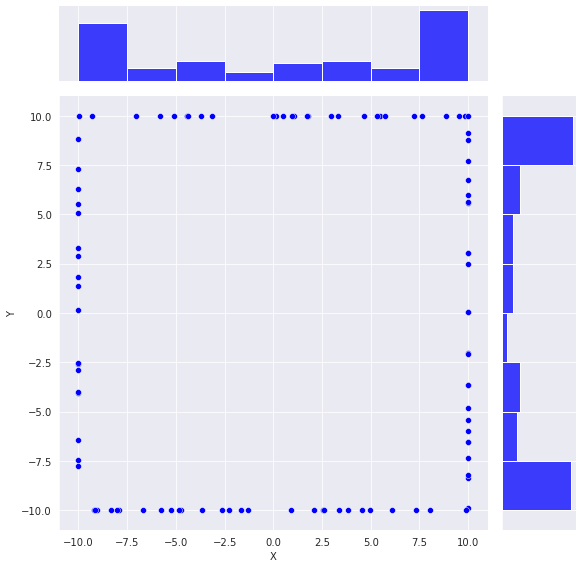

In [24]:
sns.jointplot(data=df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

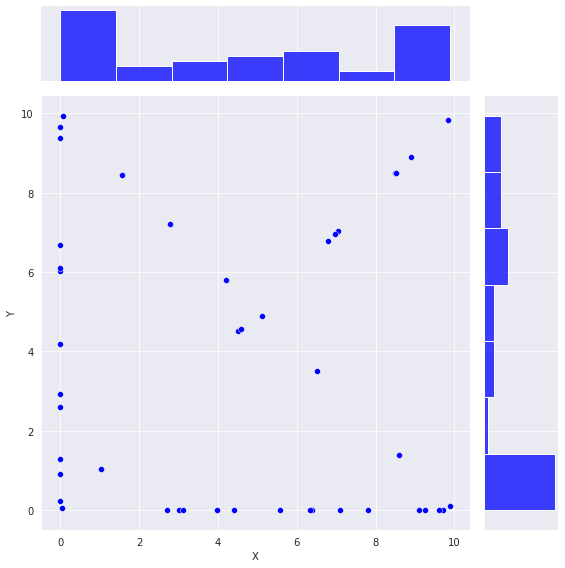

In [25]:
sns.jointplot(data=df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych parametrów dla schematów losowania punktów podanych powyżej:
    a) liczba punktów, przedziały dla współrzędnych,
    b) liczba punktów, środek i promień okręgu,
    c) liczba punktów, wierzchołki prostokąta,
    d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

**a)**

In [26]:
def random_points_on_the_range(num_of_points, ranges):
    new_data_a = np.random.uniform(ranges[0], ranges[1], size = [num_of_points, 2])
    return new_data_a

In [27]:
new_data_a = random_points_on_the_range(40, [-200, 200])

In [28]:
new_data_a[:10]

array([[  56.07324649, -116.71883642],
       [   5.22554806,   83.90985833],
       [ -97.97393838, -181.9781443 ],
       [-158.438122  , -158.06839221],
       [-151.71687686,   28.18124935],
       [  36.40662845,  175.77816828],
       [ -15.15618817,   54.6013628 ],
       [ -24.18926476,  -60.80713982],
       [  25.44109343, -109.2604492 ],
       [ -17.19147546, -137.82049804]])

In [29]:
new_df_a = pd.DataFrame(data=new_data_a, columns=['X', 'Y'])

In [30]:
new_df_a.head()

,X,Y
0,56.073246,-116.718836
1,5.225548,83.909858
2,-97.973938,-181.978144
3,-158.438122,-158.068392
4,-151.716877,28.181249


In [31]:
new_df_a.describe()

,X,Y
count,40.000000,40.000000
mean,-3.932422,4.200526
std,109.463975,126.303348
min,-166.023728,-192.370207
25%,-98.348170,-111.125046
50%,-16.809791,12.189395
75%,100.187526,116.865728
max,181.749473,198.934047


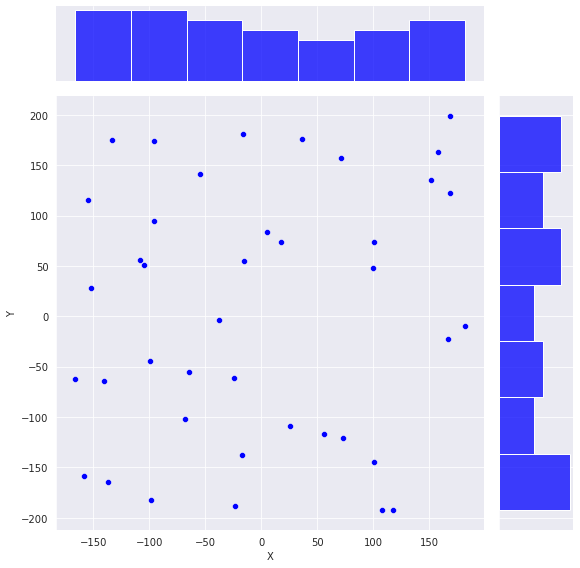

In [32]:
sns.jointplot(data=new_df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

In [33]:
def random_points_on_the_circle(num_of_points, center, R):
    new_data_b = [None for _ in range(num_of_points)]
    for i in range(num_of_points):
        alpha = 2 * np.pi * np.random.random_sample()
        new_data_b[i] = (R * np.cos(alpha) + center[0], R * np.sin(alpha) + center[1])
    return new_data_b

In [34]:
new_data_b = random_points_on_the_circle(30, [50, 50], 120)

In [35]:
new_data_b[:10]

[(129.18075180857142, -40.16877809435711),
 (-12.072936472961551, 152.6983473948032),
 (119.00033887283938, 148.1781708702771),
 (110.84375163570579, 153.43131966137022),
 (100.66231987356059, 158.78110748208545),
 (166.09513170934378, 80.36314202104461),
 (-12.57016317768219, -52.39616535748897),
 (165.89432295472287, 18.879172458522298),
 (0.7549287060581094, -59.429991105064886),
 (163.66044446574364, 88.48770406051273)]

In [36]:
new_df_b = pd.DataFrame(data=new_data_b, columns=['X', 'Y'])

In [37]:
new_df_b.head()

,X,Y
0,129.180752,-40.168778
1,-12.072936,152.698347
2,119.000339,148.178171
3,110.843752,153.431320
4,100.662320,158.781107


In [38]:
new_df_b.describe()

,X,Y
count,30.000000,30.000000
mean,65.667436,48.632812
std,83.595863,87.478093
min,-65.734133,-68.657971
25%,-12.445857,-39.849452
50%,84.340154,49.621157
75%,144.788081,122.925959
max,166.095132,169.999291


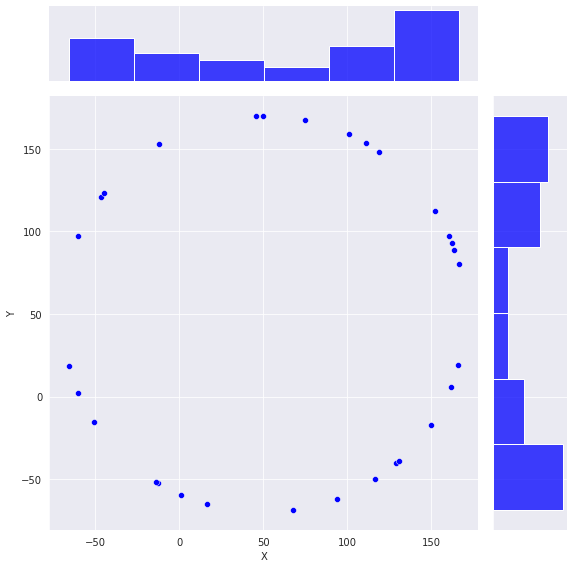

In [39]:
sns.jointplot(data=new_df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

In [40]:
def random_points_on_the_rectangle(num_of_points, vertices):
    min_y = min_x = np.inf
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])

    x_side = abs(max_x - min_x)
    y_side = abs(max_y - min_y)
    total_range = 2 * x_side + 2 * y_side
    ranges = [(0, y_side), (y_side, 2 * y_side),
              (2 * y_side, 2 * y_side + x_side), (2 * y_side + x_side, total_range)]

    new_data_c = []
    for _ in range(num_of_points):
        point = np.random.uniform(0, total_range)

        # left side
        if ranges[0][0] <= point <= ranges[0][1]:
            result = (min_x, min_y + point)

        # right side
        elif ranges[1][0] < point <= ranges[1][1]:
            result = (max_x, min_y + (point - ranges[1][0]))

        # bottom side
        elif ranges[2][0] < point <= ranges[2][1]:
            result = (min_x + (point - ranges[2][0]), min_y)

        # upper side
        else:
            result = (min_x + (point - ranges[3][0]), max_y)
        new_data_c.append(result)
    return new_data_c

In [41]:
new_data_c = random_points_on_the_rectangle(40, [(-30, -10), (-30, 40), (50, 40), (50, -10)])

In [42]:
new_data_c[:10]

[(10.398557363017545, -10),
 (-21.091489295349703, 40),
 (-30, 11.112700991984596),
 (17.493902230606864, -10),
 (8.82290967817292, -10),
 (-30, 10.939685534577531),
 (50, 25.49659088141138),
 (-10.102697425672389, -10),
 (50, 2.8030484839844334),
 (-30, 8.912795576917851)]

In [43]:
new_df_c = pd.DataFrame(data=new_data_c, columns=['X', 'Y'])

In [44]:
new_df_c.head()

,X,Y
0,10.398557,-10.000000
1,-21.091489,40.000000
2,-30.000000,11.112701
3,17.493902,-10.000000
4,8.822910,-10.000000


In [45]:
new_df_c.describe()

,X,Y
count,40.000000,40.000000
mean,6.574296,4.332281
std,30.765688,19.119031
min,-30.000000,-10.000000
25%,-24.312717,-10.000000
50%,9.244348,-9.797222
75%,37.579936,11.423270
max,50.000000,40.000000


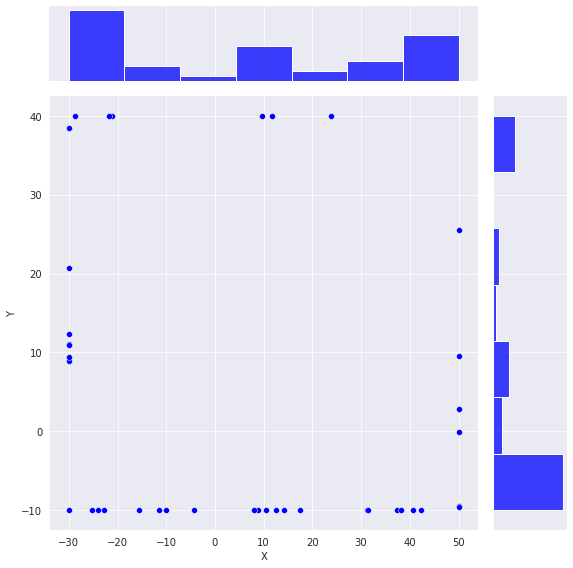

In [46]:
sns.jointplot(data=new_df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

In [47]:
def random_points_on_square(vertices, side_num_of_points, diag_num_of_points):
    min_y = min_x = np.inf 
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])
    
    side = abs(max_x-min_x)
    total_range = 2 * side

    new_data_d = []
    for _ in range(side_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            side_result = (min_x, min_y+point)
        else:
            side_result = (min_x+(point-total_range/2), min_y)
        new_data_d.append(side_result)

    for _ in range(diag_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            diag_result = (min_x+point, min_y+point)
        else:
            diag_result = (min_x+(point-total_range/2), max_y-(point-total_range/2))
        new_data_d.append(diag_result)
    return new_data_d

In [48]:
new_data_d = random_points_on_square([(-30, -10), (-30, 30), (10, 30), (10, -10)], 40, 20)

In [49]:
new_data_d[:10]

[(-24.633190316650122, -10),
 (-30, 12.351146551002152),
 (-30, -9.635874272182923),
 (-30, -5.322709026453607),
 (-25.55094252694488, -10),
 (-17.13291619048455, -10),
 (-6.1345894371066905, -10),
 (-6.971234732602063, -10),
 (7.420631252387295, -10),
 (-30, 0.9440015098667676)]

In [50]:
new_df_d = pd.DataFrame(data=new_data_d, columns=['X', 'Y'])

In [51]:
new_df_d.head()

,X,Y
0,-24.633190,-10.000000
1,-30.000000,12.351147
2,-30.000000,-9.635874
3,-30.000000,-5.322709
4,-25.550943,-10.000000


In [52]:
new_df_d.describe()

,X,Y
count,60.000000,60.000000
mean,-17.358231,-0.535275
std,12.198824,10.592438
min,-30.000000,-10.000000
25%,-30.000000,-10.000000
50%,-18.851766,-3.545282
75%,-6.996981,7.304982
max,8.704052,28.704052


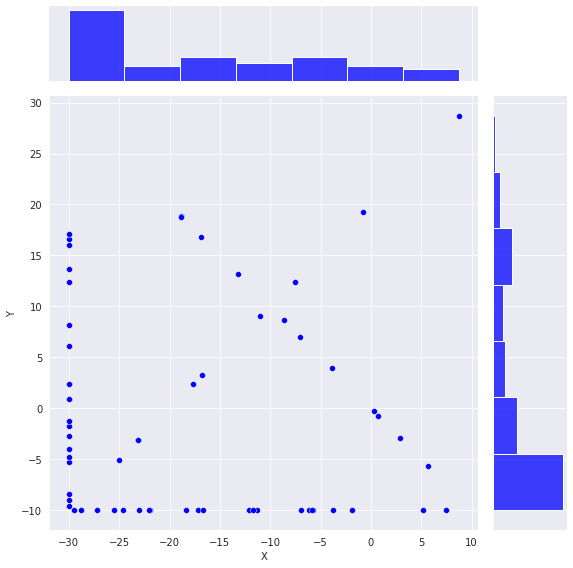

In [53]:
sns.jointplot(data=new_df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość sprawdzenia czasu działania algorytmu.

In [54]:
def scatter_plot(df, hull, algorithm, final_plot = False):
    if algorithm.__name__ == "graham_algorithm":
        points = df
        x, y = zip(*points)
    else:
        x, y = df['X'], df['Y']
    plt.scatter(x, y, c='red')
    if len(hull) != 0:
        for i in range(len(hull)):
            if i == len(hull) - 1:
                if final_plot:
                    i = -1
                else:
                    break
            x1, y1 = hull[i]
            x2, y2 = hull[i + 1]
            plt.plot((x1, x2), (y1, y2), linestyle='-', color='blue')
            plt.scatter((x1, x2), (y1, y2), c='blue')
    plt.show()

### Algorytm Grahama

In [55]:
def distance(point_1, point_2):
    return np.sqrt((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2)


def compare(a, b, c, epsilon):
    orientation = det(c, a, b)
    if -epsilon <= orientation <= epsilon:
        return distance(a, c) < distance(b, c)
    else:
        return orientation > epsilon


def find_lowest_point(df_points):
    lowest_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[1] < lowest_point[1]:
            lowest_point = point
        elif point[1] == lowest_point[1] and point[0] < lowest_point[0]:
            lowest_point = point
    return lowest_point


def det(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    first = (a_x - c_x) * (b_y - c_y)
    second = (a_y - c_y) * (b_x - c_x)
    return first - second

def quicksort(points, l, r, comparator = lambda x, y: x < y):
    if l == r:
        return
    mid = (l + r) // 2
    pivot = points[mid]
    idx = l
    points[r - 1], points[mid] = points[mid], points[r - 1]
    for i in range(l, r - 1):
        if comparator(points[i], pivot):
            points[i], points[idx] = points[idx], points[i]
            idx += 1
    points[r - 1], points[idx] = points[idx], points[r - 1]
    quicksort(points, l, idx, comparator)
    quicksort(points, idx + 1, r, comparator)

In [56]:
def graham_algorithm(df, epsilon=10 ** (-12), write_to_file=False, visualize=True):
    lowest_point = find_lowest_point(df)
    points = []
    for index, row in df.iterrows():
        points.append((df['X'][index], df['Y'][index]))
    
    comparator = partial(compare, c = lowest_point, epsilon=epsilon)
    quicksort(points, 0, len(points), comparator)
    convex_hull = [points[0], points[1], points[2]]
    
    for point in points[3:]:
        orientation = det(convex_hull[-2], convex_hull[-1], point)
        while orientation < -epsilon:
            convex_hull.pop()
            orientation = det(convex_hull[-2], convex_hull[-1], point)
        if -epsilon <= orientation <= epsilon:
            convex_hull.pop()
        convex_hull.append(point)
        if visualize:
            scatter_plot(points, convex_hull, graham_algorithm)
    if visualize:
        scatter_plot(points, convex_hull, graham_algorithm, final_plot=True)
    if write_to_file:
        with open('graham_result.txt', 'wb') as file:
            file.write(convex_hull)
    return convex_hull 

### Algorytm Jarvisa

In [57]:
def find_left_most_point(df_points):
    left_most_index = 0
    left_most_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[0] < left_most_point[0]:
            left_most_point = point
            left_most_index = index
        elif point[0] == left_most_point[0] and point[1] < left_most_point[1]:
            left_most_point = point
            left_most_index = index
    return left_most_point, left_most_index

def distance(point_1, point_2):
    return (point_2[0] - point_1[0]) ** 2 + (point_2[1] - point_1[1]) ** 2

In [58]:
def jarvis_algorithm(df, epsilon=10 ** (-12), write_to_file=False, visualize=True):
    convex_point, convex_idx = find_left_most_point(df)
    convex_hull = [convex_point]
    p = convex_idx
    while True:
        q = (p + 1) % len(df)
        for index, row in df.iterrows():
            if index == p and index == q:
                continue
            point_1 = df['X'][p], df['Y'][p]
            point_2 = df['X'][q], df['Y'][q]
            point_3 = df['X'][index], df['Y'][index]
            orientation = det(point_1, point_2, point_3)
            if orientation > epsilon:
                q = index
            elif -epsilon <= orientation <= epsilon:
                if distance(point_1, point_2) < distance(point_1, point_3):
                    q = index
        p = q
        convex_hull.append((df['X'][p], df['Y'][p]))
        if visualize:
            scatter_plot(df, convex_hull, jarvis_algorithm)
        if p == convex_idx:
            break
    if write_to_file:
        with open('jarvis_result.txt', 'wb') as file:
            file.write(convex_hull)
    return convex_hull

## Uruchom aplikację graficzną tak, aby można było zilustrować graficznie poszczególne kroki realizacji algorytmu. Jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualnie rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).

## Algorytm Grahama

**3. a)**

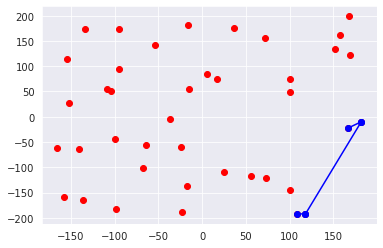

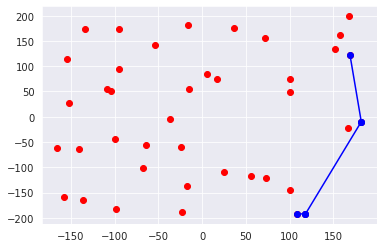

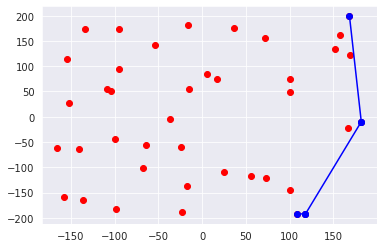

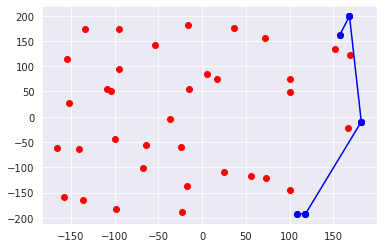

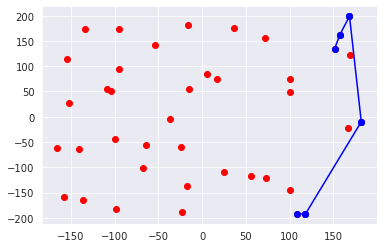

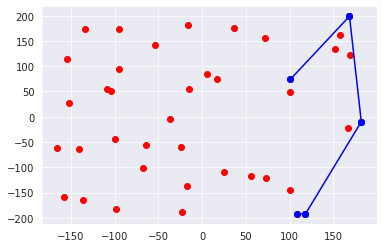

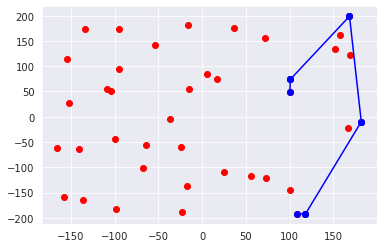

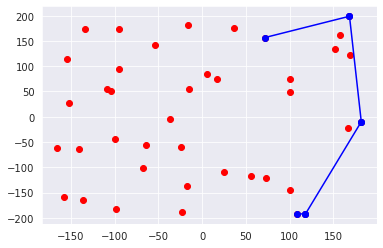

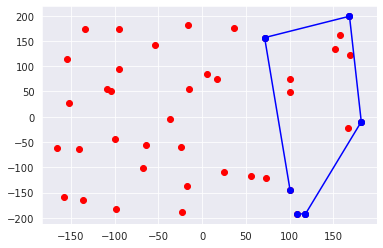

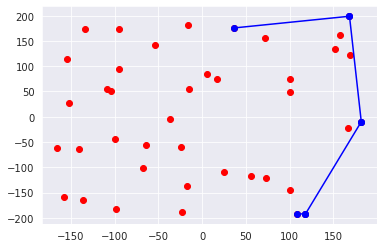

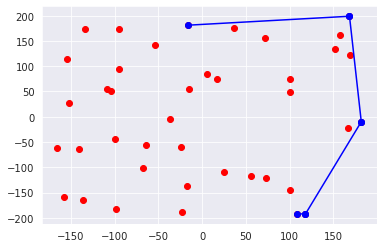

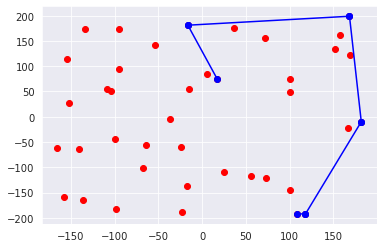

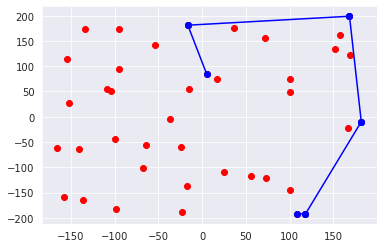

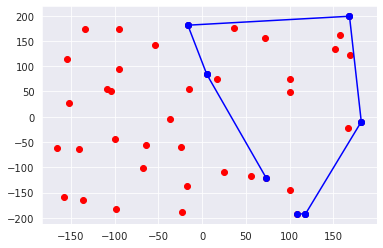

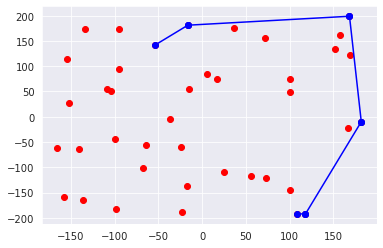

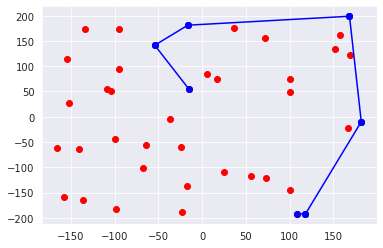

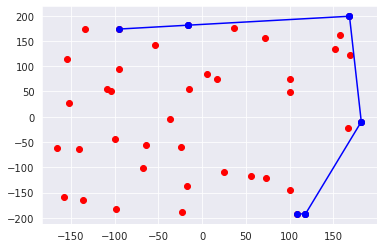

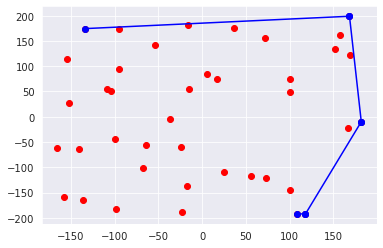

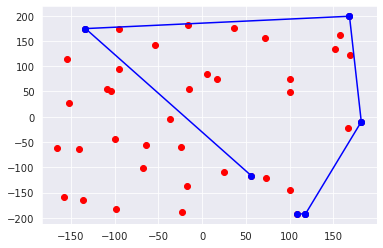

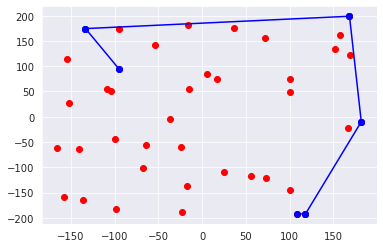

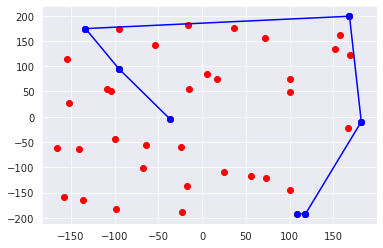

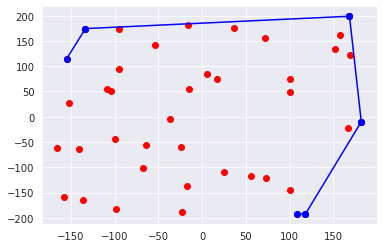

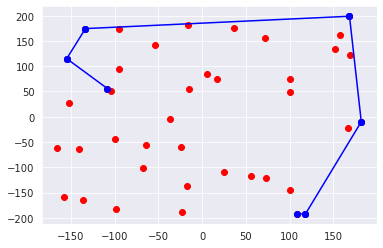

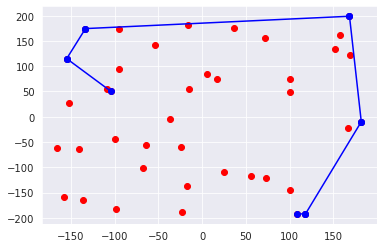

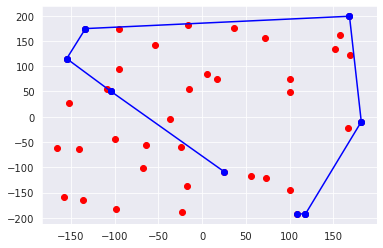

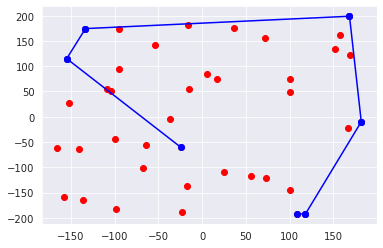

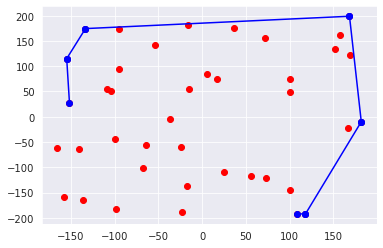

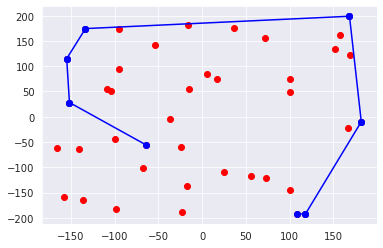

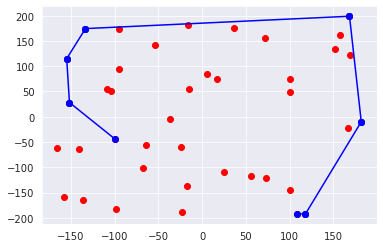

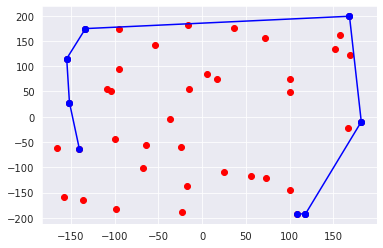

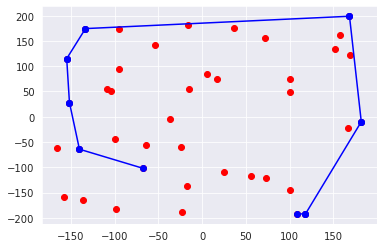

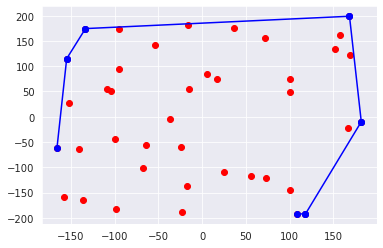

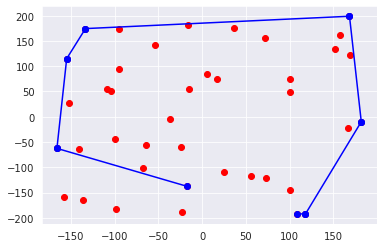

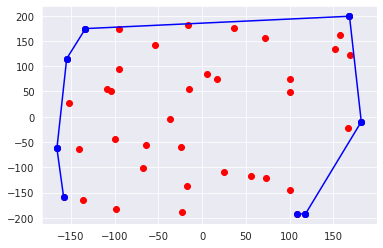

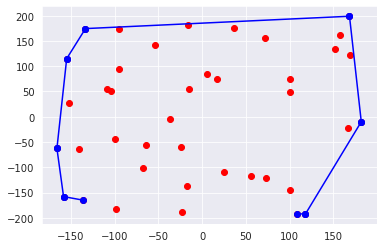

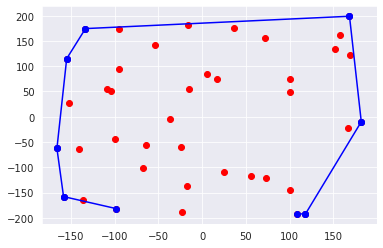

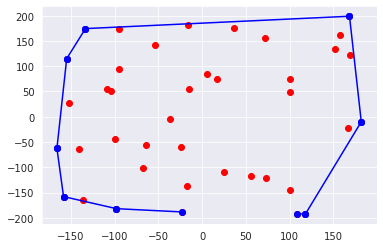

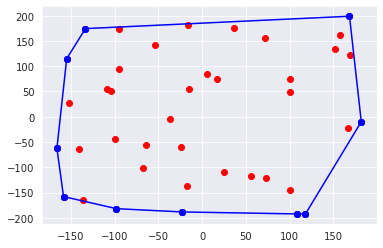

[(107.73605729739637, -192.3702071318644), (117.9942739362819, -192.35409706909707), (181.7494733838244, -9.925013366244428), (168.28009964258194, 198.93404676920397), (-133.3850523658486, 174.48767115399272), (-154.84761412906073, 115.0121650042484), (-166.02372849711253, -62.64800134830941), (-158.43812200471055, -158.06839220732147), (-97.9739383791963, -181.97814430071188), (-23.132980225667495, -188.46255020001615)]


In [59]:
print(graham_algorithm(new_df_a))

**3. b)**

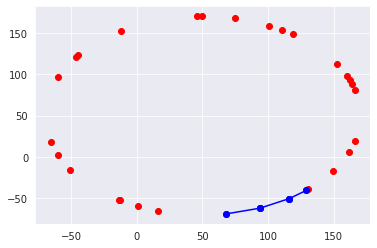

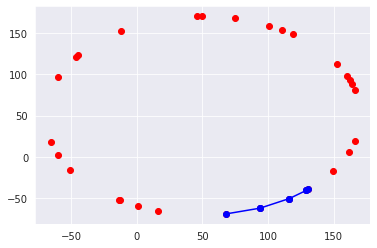

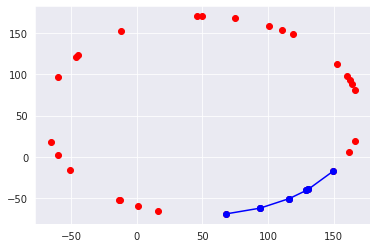

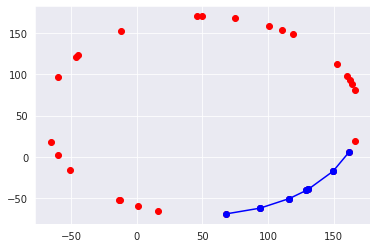

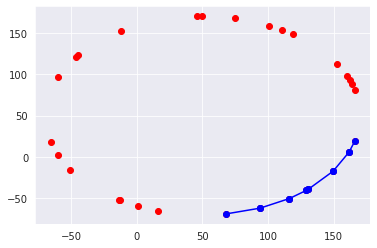

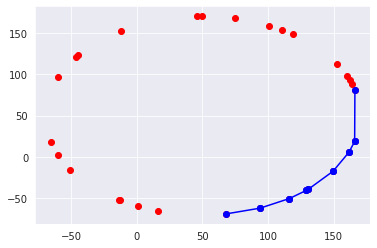

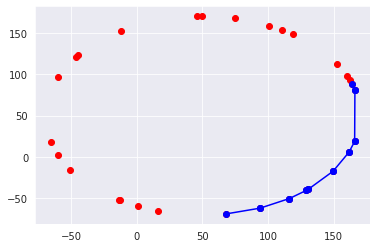

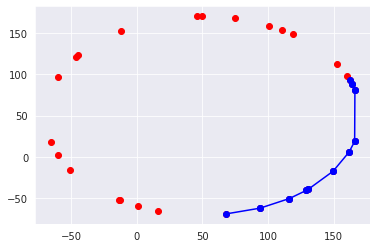

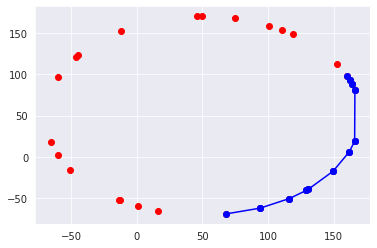

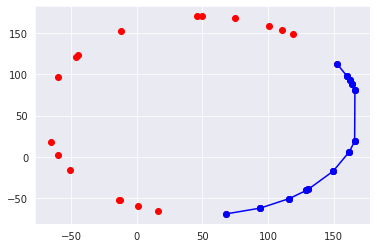

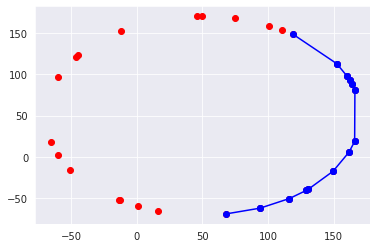

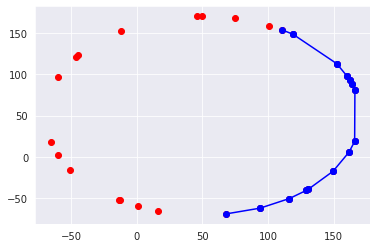

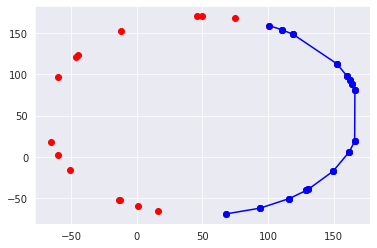

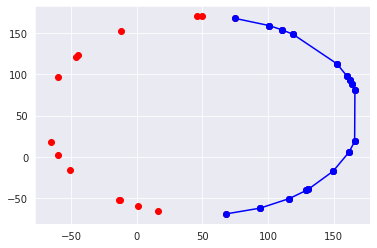

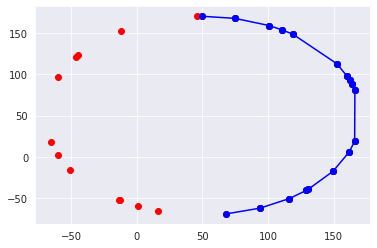

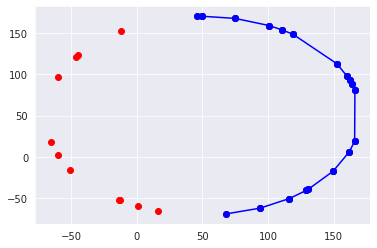

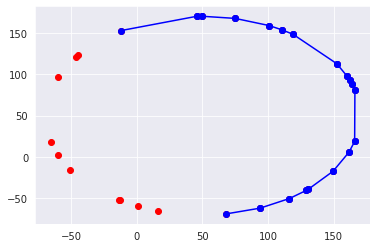

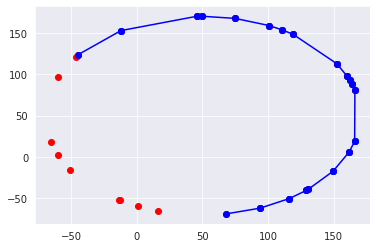

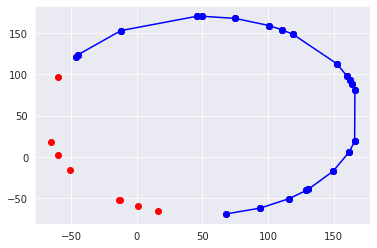

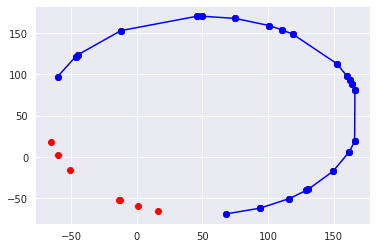

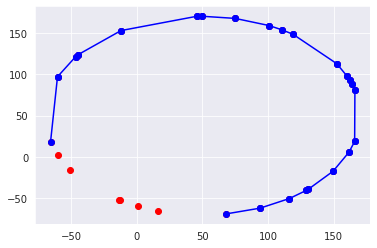

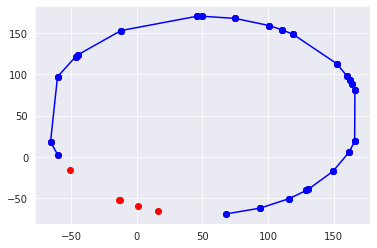

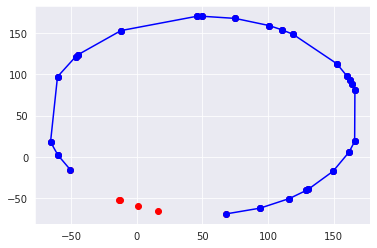

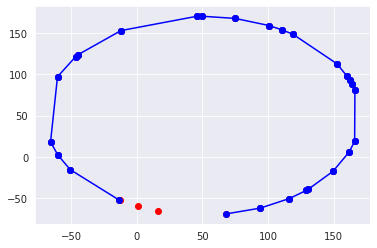

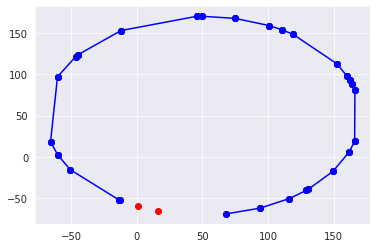

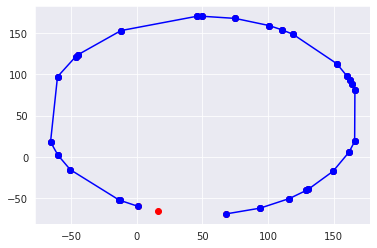

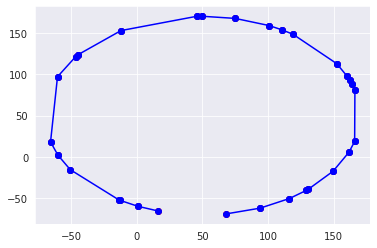

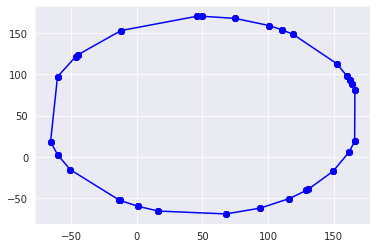

[(67.89653184540013, -68.65797127840412), (93.87453434110726, -61.691652491808895), (116.2215629498452, -50.07349599409271), (129.18075180857142, -40.16877809435711), (130.6120708659049, -38.891473329618776), (149.51341713410386, -17.060269983753003), (161.62876442536137, 5.965707081103552), (165.89432295472287, 18.879172458522298), (166.09513170934378, 80.36314202104461), (163.66044446574364, 88.48770406051273), (162.03628103523278, 92.98687860026988), (160.2702461210682, 97.33363307838351), (152.3343999865259, 112.67113035040714), (119.00033887283938, 148.1781708702771), (110.84375163570579, 153.43131966137022), (100.66231987356059, 158.78110748208545), (74.80577333619375, 167.40814967110833), (49.587437463012556, 169.99929079854212), (45.571440941419766, 169.91825492669858), (-12.072936472961551, 152.6983473948032), (-44.84488200719744, 123.51495328870716), (-46.625048882727555, 121.15897644296544), (-60.430830239150794, 96.95776541416618), (-65.73413340903916, 18.288639826416723), 

In [60]:
print(graham_algorithm(new_df_b))

**3. c)**

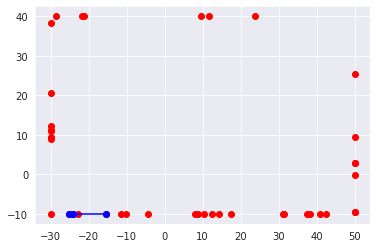

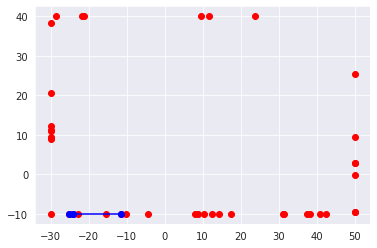

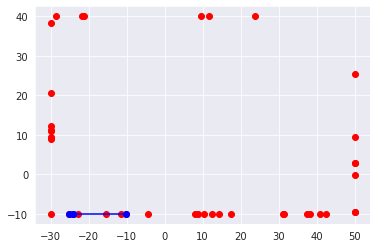

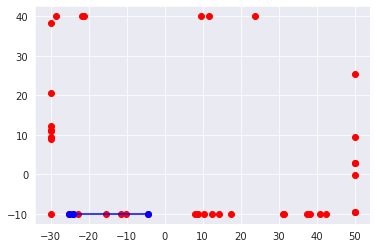

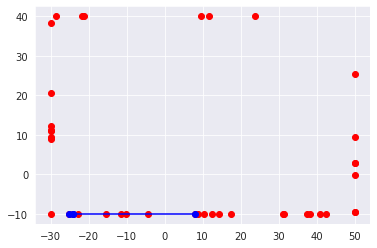

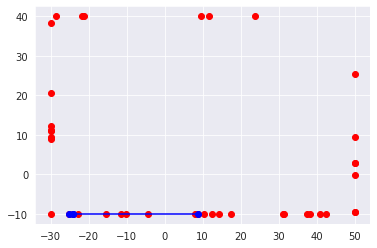

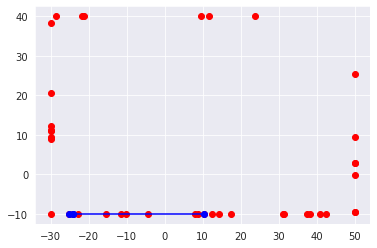

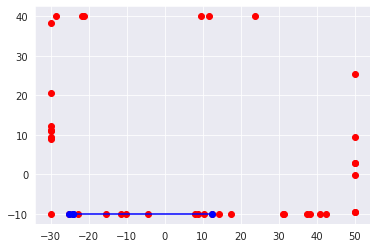

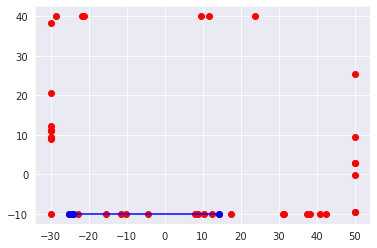

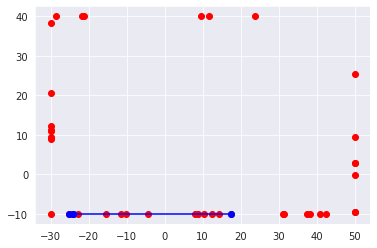

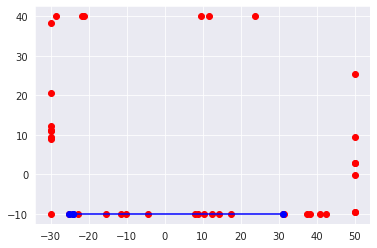

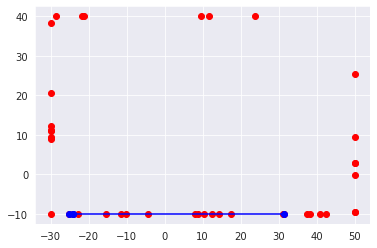

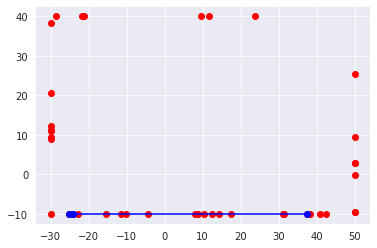

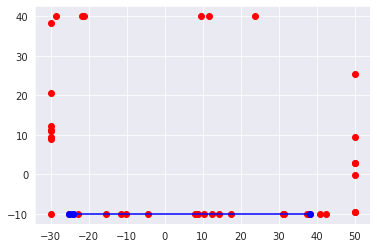

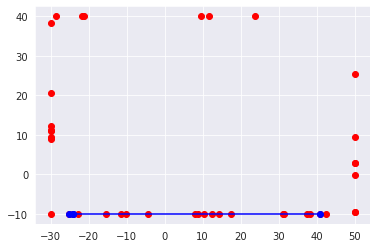

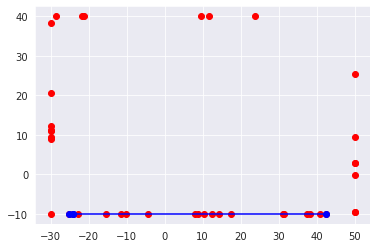

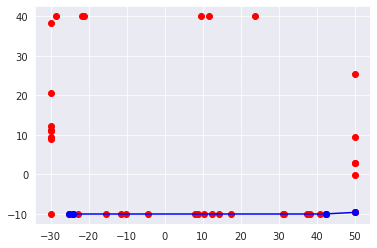

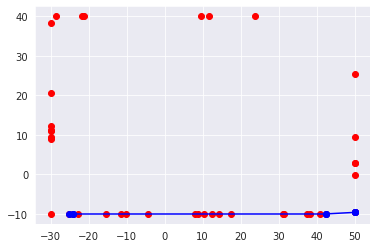

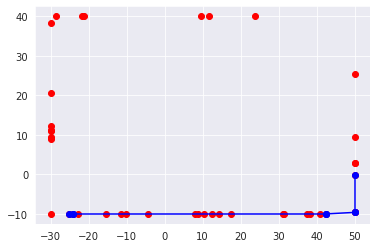

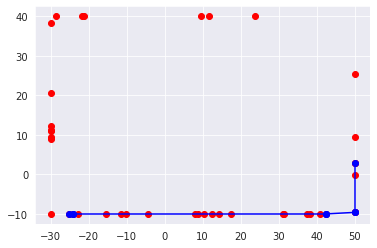

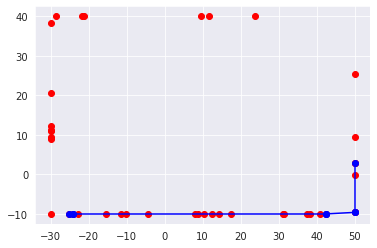

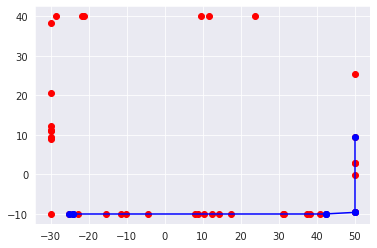

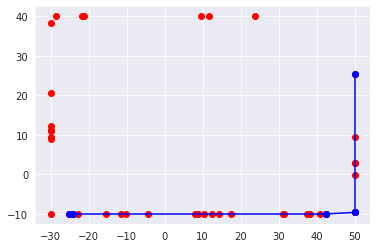

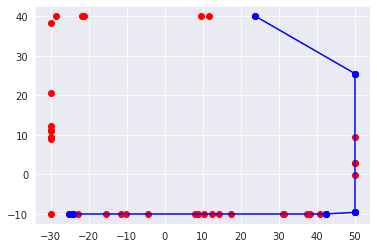

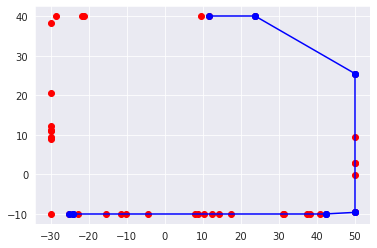

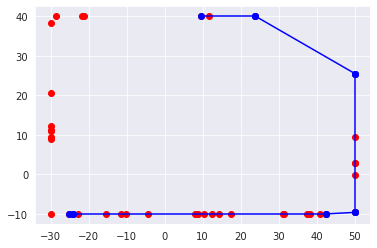

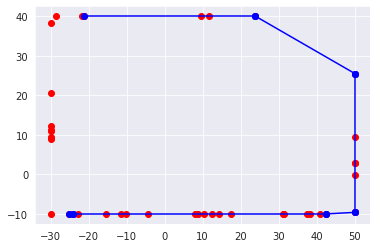

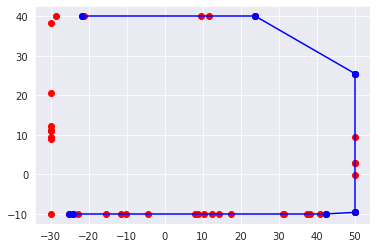

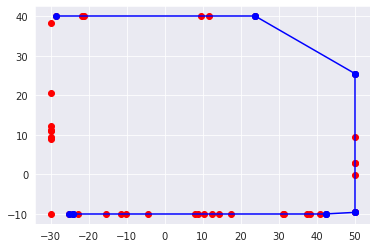

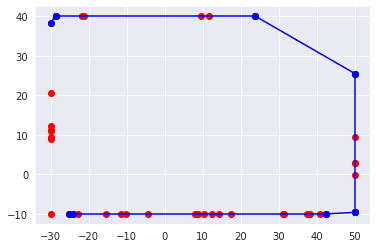

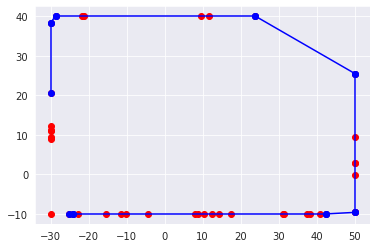

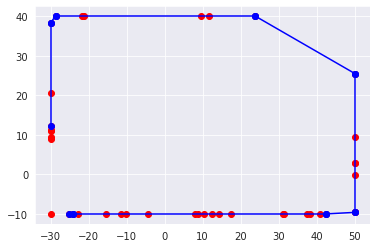

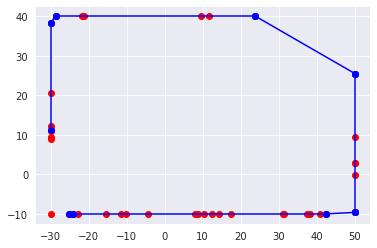

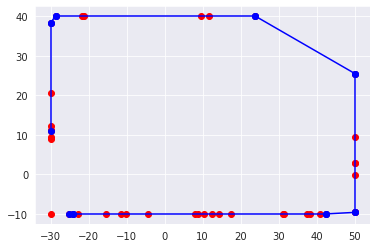

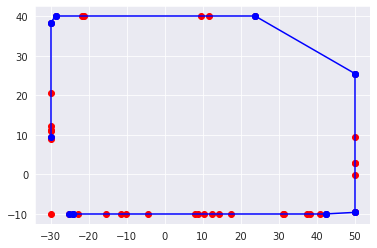

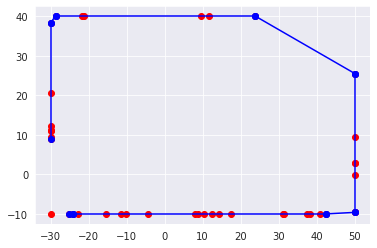

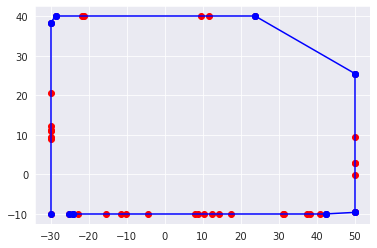

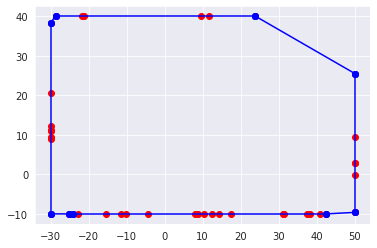

[(-25.261381186010098, -10.0), (-23.996496171396103, -10.0), (42.31828765976152, -10.0), (50.0, -9.608870788544507), (50.0, 25.49659088141138), (23.869947328857677, 40.0), (-28.653605759895385, 40.0), (-30.0, 38.407709888938015), (-30.0, -9.98557374613898)]


In [61]:
print(graham_algorithm(new_df_c))

**1. d)**

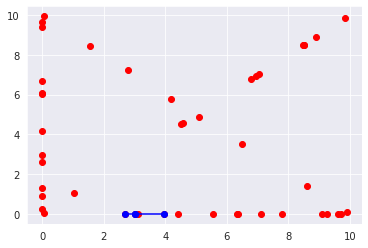

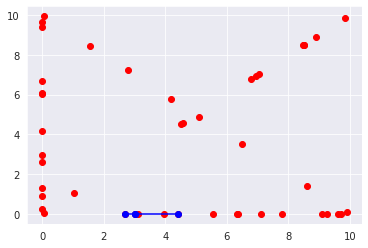

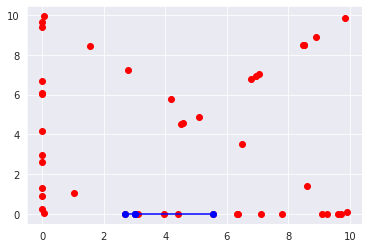

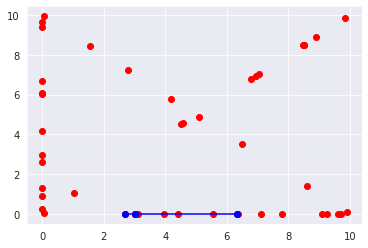

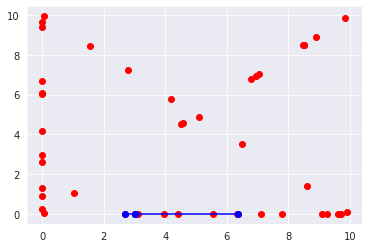

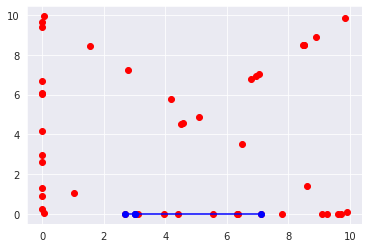

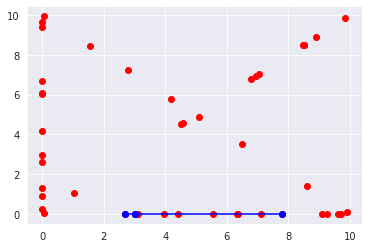

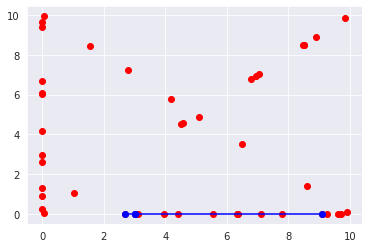

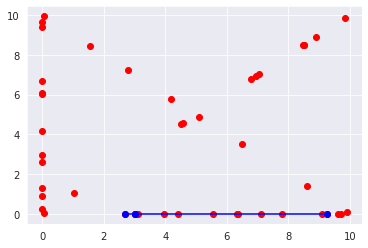

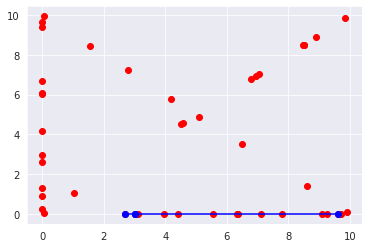

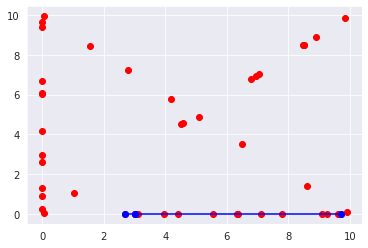

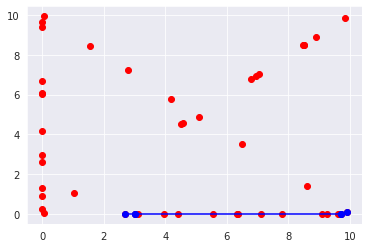

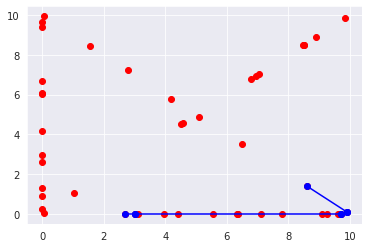

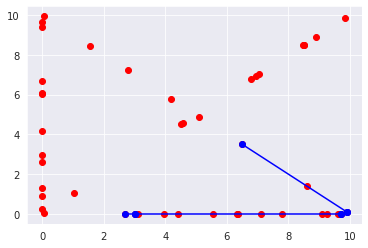

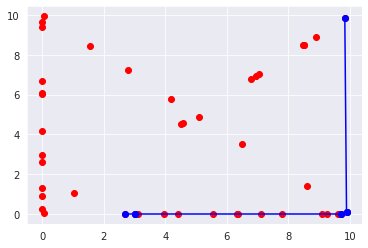

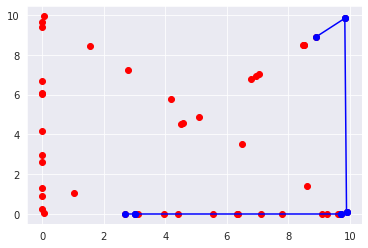

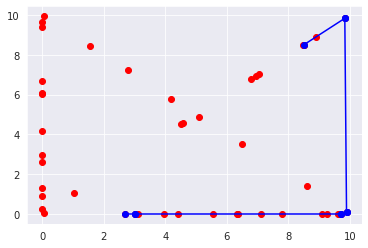

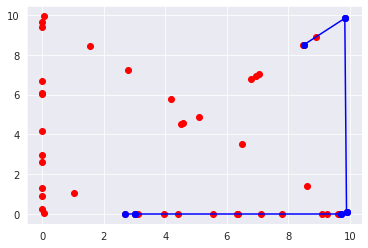

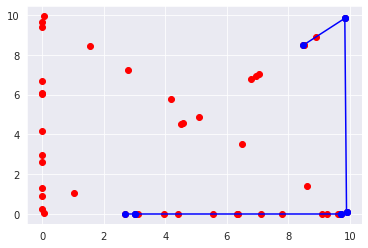

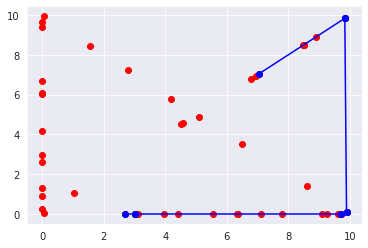

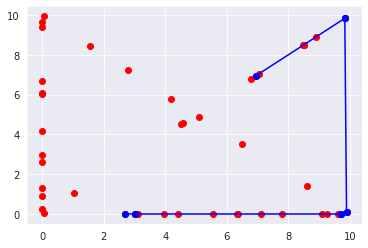

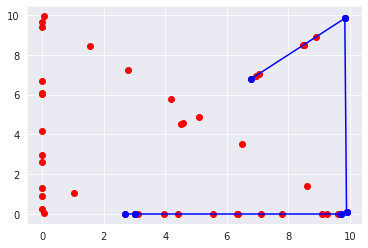

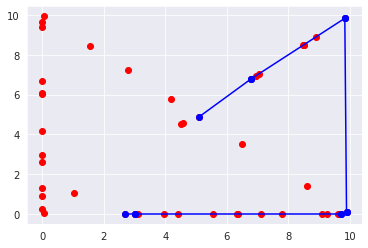

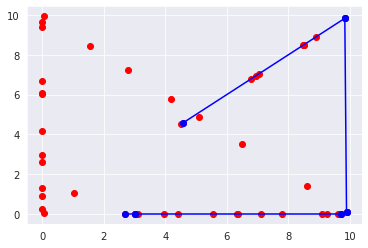

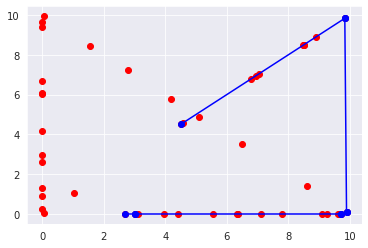

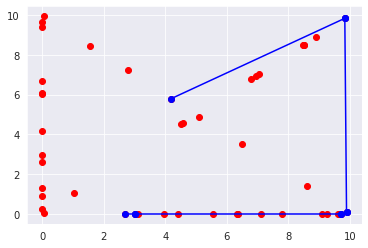

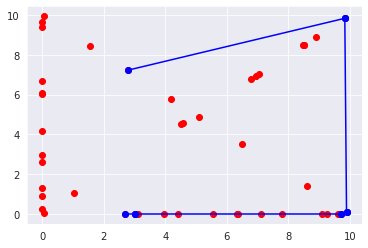

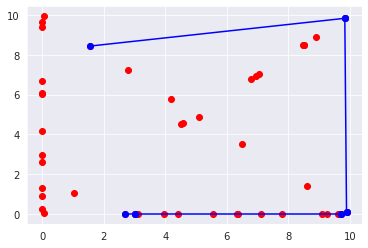

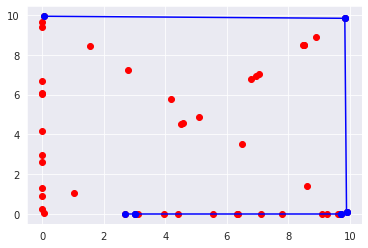

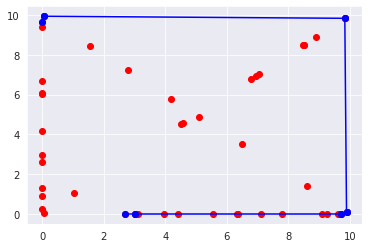

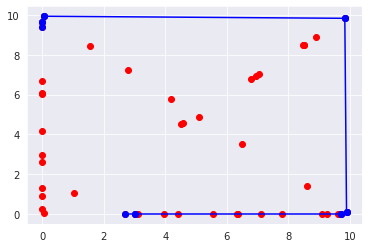

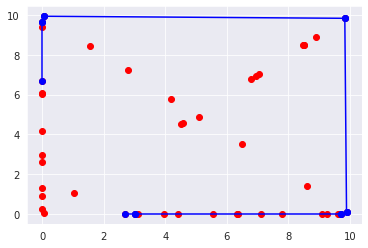

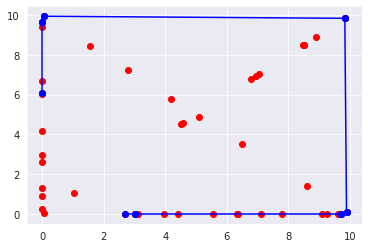

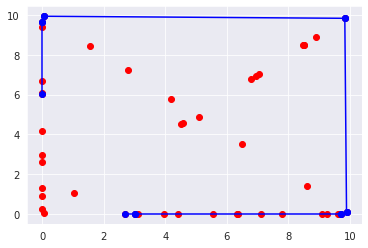

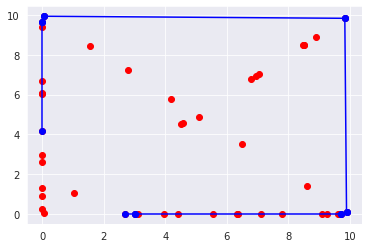

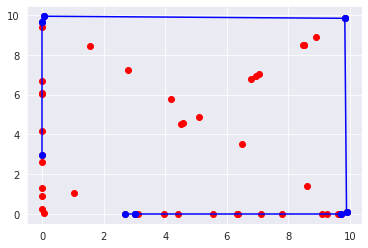

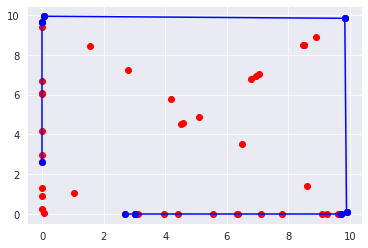

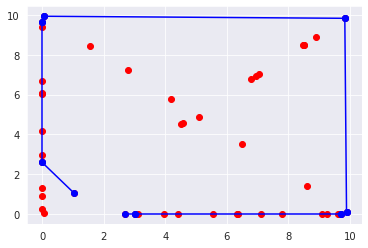

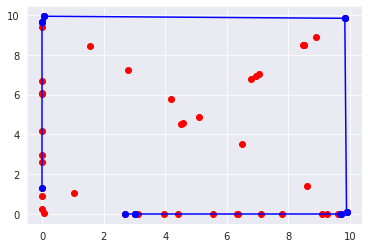

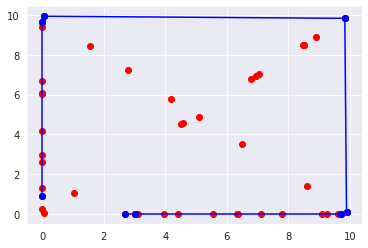

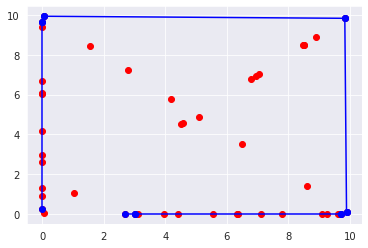

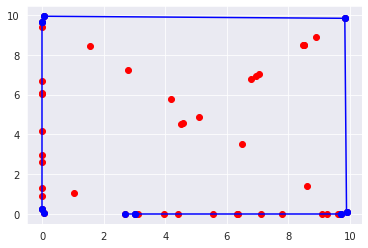

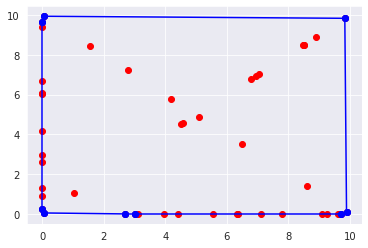

[(2.698851318299715, 0.0), (3.0135408739558436, 0.0), (9.718752888469659, 0.0), (9.890669756402172, 0.10933024359782806), (9.834974640921168, 9.834974640921168), (0.06138088280955678, 9.938619117190443), (0.0, 9.669179412529791), (0.0, 0.23706652884022628), (0.04834304295167513, 0.04834304295167513)]


In [62]:
print(graham_algorithm(df_d))

## Algorytm Jarvis

**1. a)**

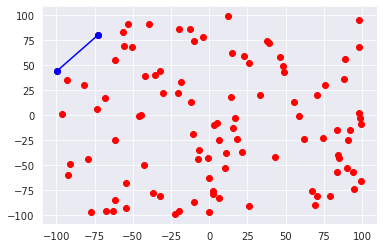

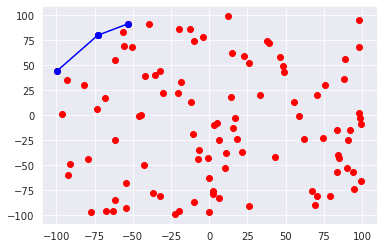

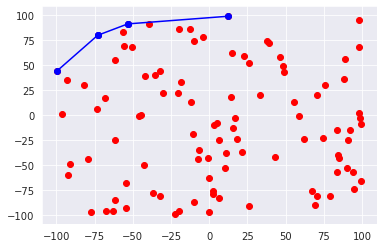

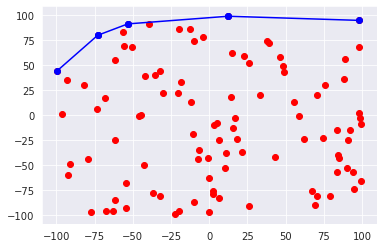

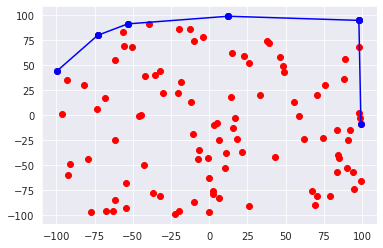

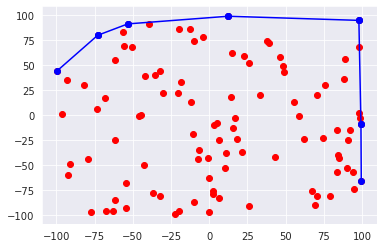

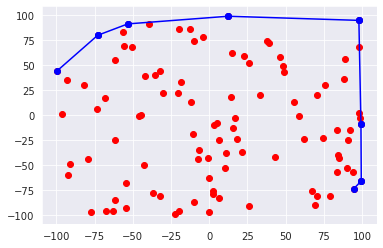

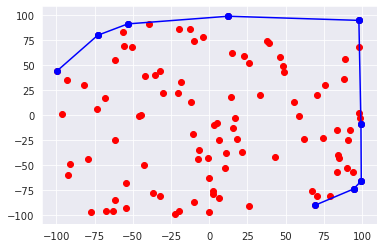

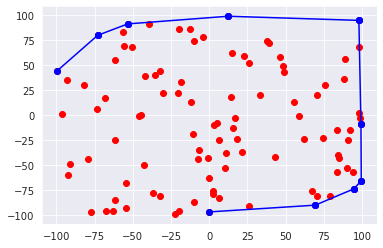

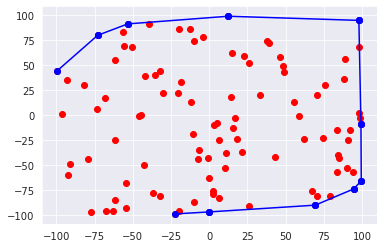

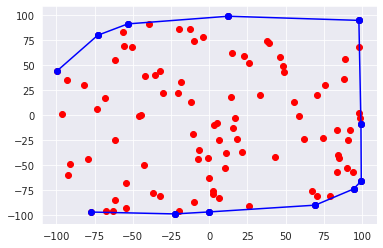

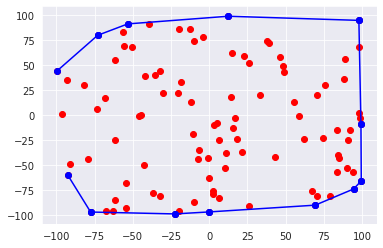

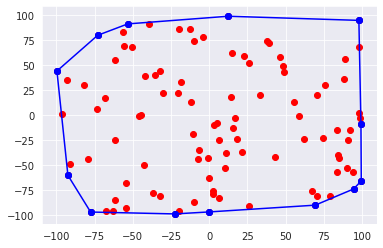

[(-99.67375769231488, 43.74931554050383), (-72.99875128073312, 79.47994350689234), (-53.3215095107747, 90.8805969930261), (12.39536505273611, 98.54771609358247), (97.98703964561594, 94.41092907414702), (99.33701377737347, -9.403829199973785), (99.55696118345028, -66.1645448822088), (94.4745118253895, -74.25965788319651), (69.4054255538529, -90.41325952775436), (-0.004931006851435882, -97.18430604688429), (-22.514356130514173, -99.17574071036842), (-77.61637613406617, -97.29046723632145), (-92.46904491957038, -60.60812586771964), (-99.67375769231488, 43.74931554050383)]


In [63]:
print(jarvis_algorithm(df_a))

**3. b)**

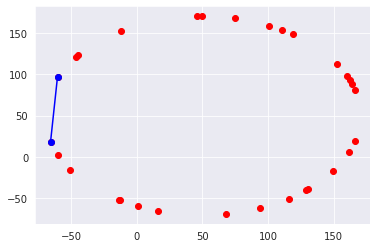

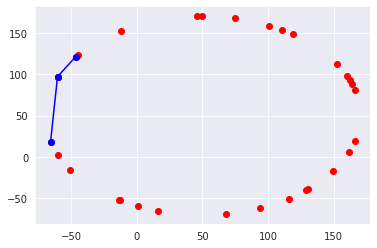

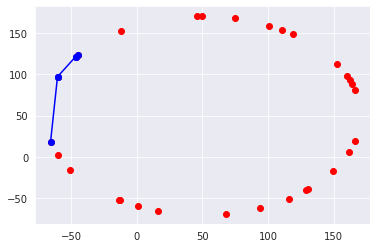

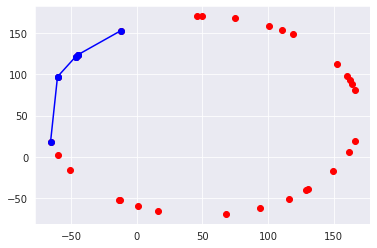

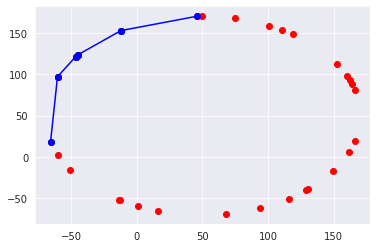

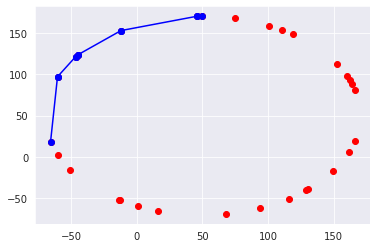

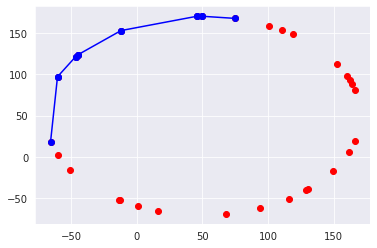

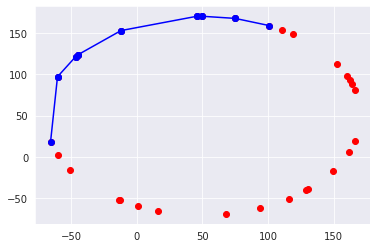

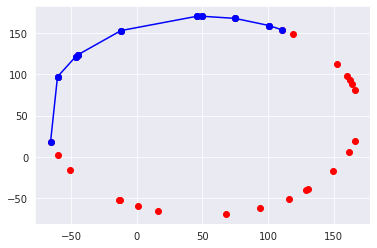

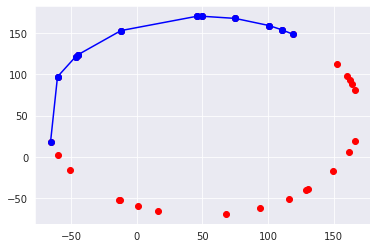

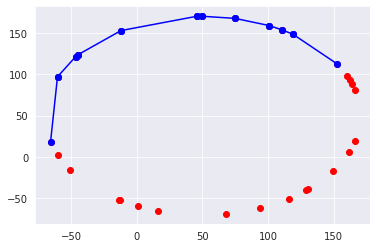

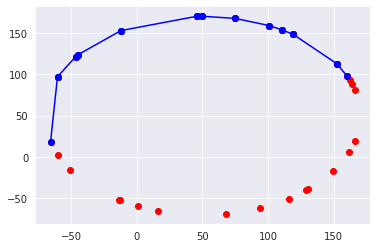

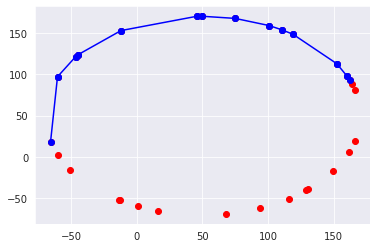

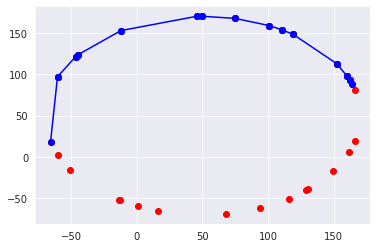

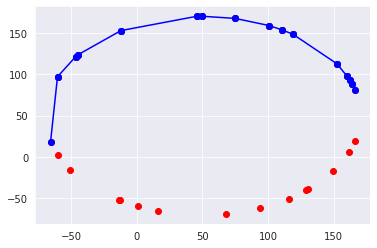

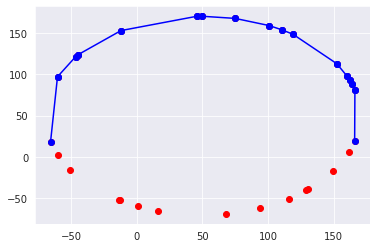

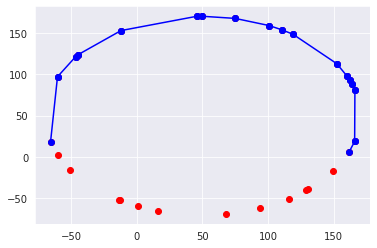

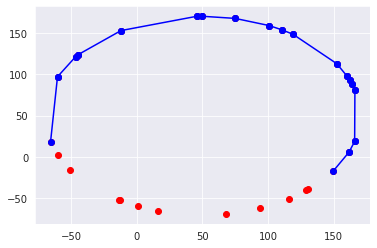

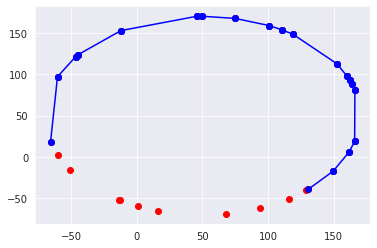

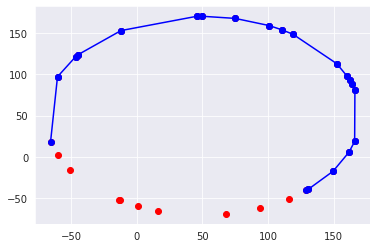

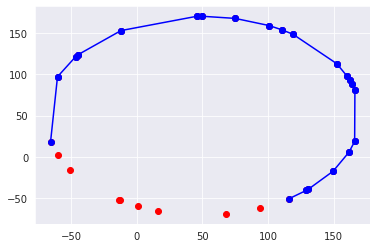

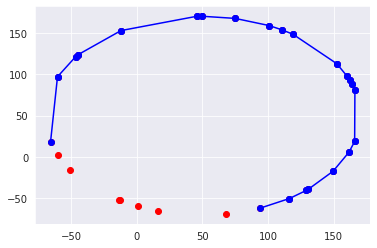

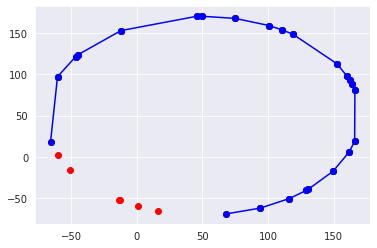

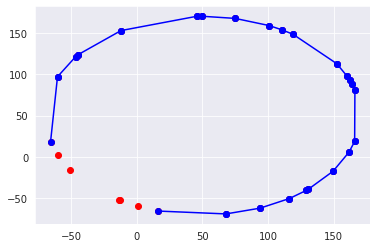

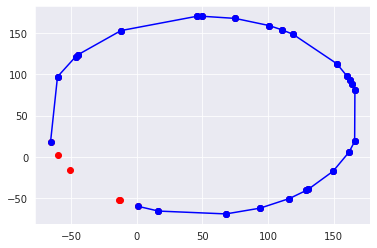

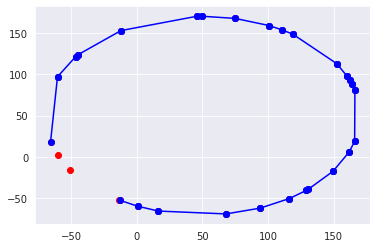

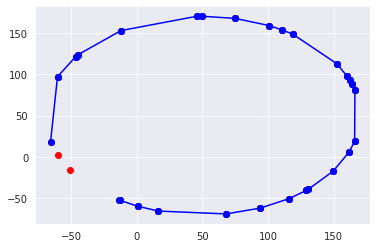

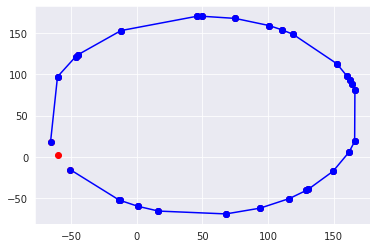

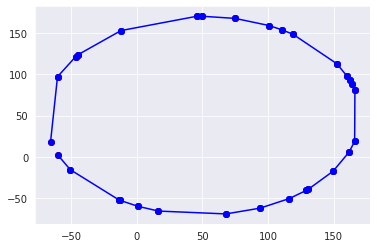

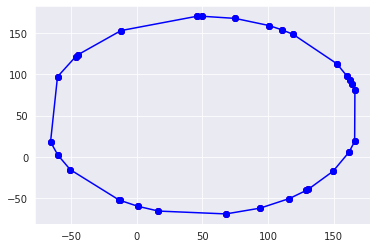

[(-65.73413340903916, 18.288639826416723), (-60.430830239150794, 96.95776541416618), (-46.625048882727555, 121.15897644296544), (-44.84488200719744, 123.51495328870716), (-12.072936472961551, 152.6983473948032), (45.571440941419766, 169.91825492669858), (49.587437463012556, 169.99929079854212), (74.80577333619375, 167.40814967110833), (100.66231987356059, 158.78110748208545), (110.84375163570579, 153.43131966137022), (119.00033887283938, 148.1781708702771), (152.3343999865259, 112.67113035040714), (160.2702461210682, 97.33363307838351), (162.03628103523278, 92.98687860026988), (163.66044446574364, 88.48770406051273), (166.09513170934378, 80.36314202104461), (165.89432295472287, 18.879172458522298), (161.62876442536137, 5.965707081103552), (149.51341713410386, -17.060269983753003), (130.6120708659049, -38.891473329618776), (129.18075180857142, -40.16877809435711), (116.2215629498452, -50.07349599409271), (93.87453434110726, -61.691652491808895), (67.89653184540013, -68.65797127840412), 

In [64]:
print(jarvis_algorithm(new_df_b))

**1. c)**

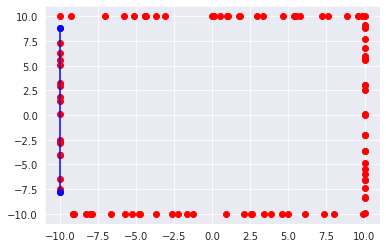

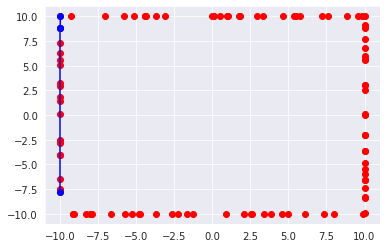

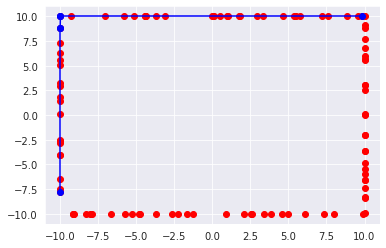

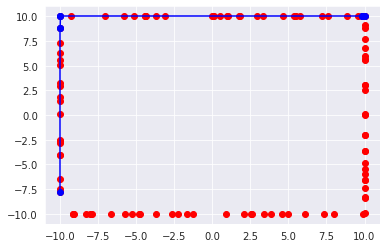

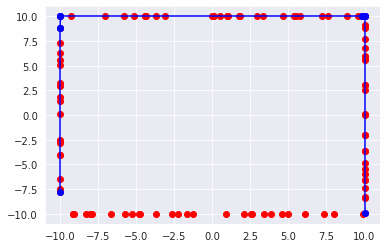

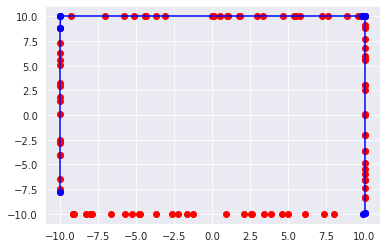

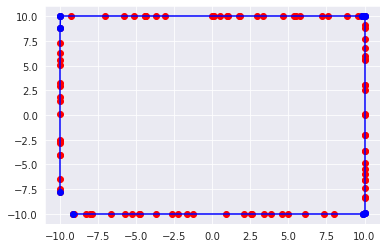

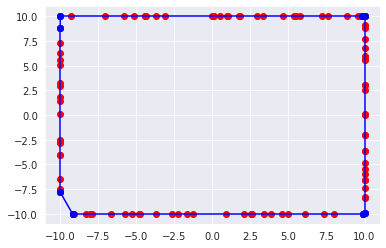

[(-10.0, -7.7876176505751005), (-10.0, 8.833074072840343), (-9.983017644457703, 10.0), (9.838033401177057, 10.0), (10.0, 9.980365440251816), (10.0, -9.888528096142991), (9.86801385118558, -10.0), (-9.185059406617722, -10.0), (-10.0, -7.7876176505751005)]


In [65]:
print(jarvis_algorithm(df_c))

**3. d)**

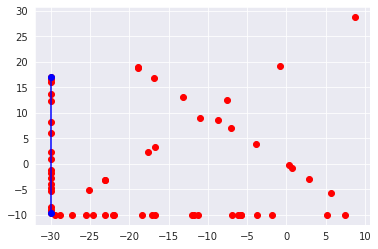

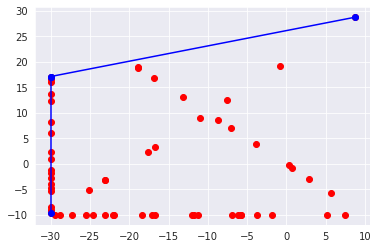

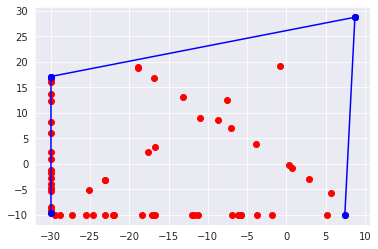

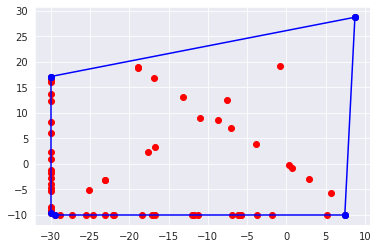

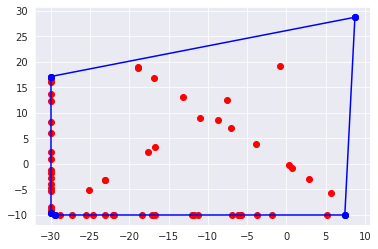

[(-30.0, -9.635874272182923), (-30.0, 17.09169124232598), (8.70405170099066, 28.70405170099066), (7.420631252387295, -10.0), (-29.44554322600684, -10.0), (-30.0, -9.635874272182923)]


In [66]:
print(jarvis_algorithm(new_df_d))

---
## Porównaj czasy działania obu algorytmów w zależności od liczby punktów w poszczególnych zbiorach (a, b, c, d).

In [67]:
def count_time(algorithm, df):
    start = perf_counter()
    algorithm(df, visualize=False)
    end = perf_counter()
    time = end - start
    return time

**a)**

In [68]:
def time_comparison_on_the_range():
    columns = ["Number of points", "a", "b", "Time of graham algorithm", "Time of jarvis algorithm", "Faster algorithm",
               "Time comparison"]
    data = []
    for i in range(1, 11):
        current_range = [-100, 100]
        num_of_points = i * 100
        new_data = random_points_on_the_range(num_of_points, current_range)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, current_range[0], current_range[1], graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [69]:
time_comparison_df_a = time_comparison_on_the_range()
time_comparison_df_a

,Number of points,a,b,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,100,-100,100,0.013758,0.094807,graham_algorithm,0.081050
1,200,-100,100,0.027345,0.239163,graham_algorithm,0.211818
2,300,-100,100,0.043209,0.370138,graham_algorithm,0.326928
3,400,-100,100,0.057716,0.485815,graham_algorithm,0.428099
4,500,-100,100,0.069797,0.672913,graham_algorithm,0.603115
5,600,-100,100,0.082836,0.846181,graham_algorithm,0.763345
6,700,-100,100,0.094934,0.977776,graham_algorithm,0.882842
7,800,-100,100,0.112475,1.166199,graham_algorithm,1.053724
8,900,-100,100,0.133441,1.222441,graham_algorithm,1.089000
9,1000,-100,100,0.143131,1.471718,graham_algorithm,1.328588


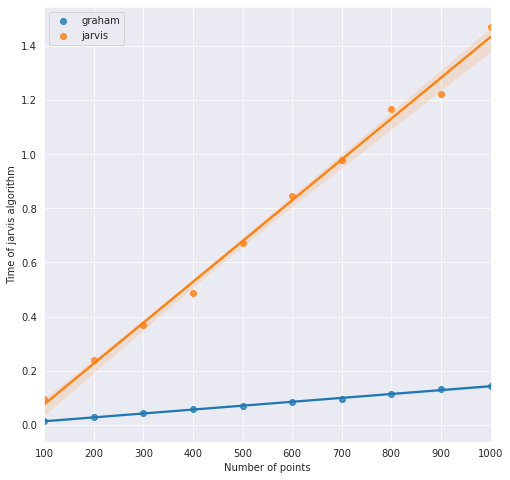

In [70]:
x = 'Number of points'
y_1 = 'Time of graham algorithm'
y_2 = 'Time of jarvis algorithm'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_a, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_a, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**b)**

In [71]:
def time_comparison_on_the_circle():
    columns = ["Number of points", "center", "R", "Time of graham algorithm", "Time of jarvis algorithm",
               "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        center = [np.random.uniform(-20, 20), np.random.uniform(-20, 20)]
        R = np.random.uniform(1, 20)
        num_of_points = i * 100
        new_data = random_points_on_the_circle(num_of_points, center, R)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, center, R, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [72]:
time_comparison_df_b = time_comparison_on_the_circle()
time_comparison_df_b

,Number of points,center,R,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,100,"[-13.136676503734904, -19.923250583196257]",10.252832,0.013755,0.882644,graham_algorithm,0.868889
1,200,"[11.831096544190984, 7.428669892161874]",3.516781,0.027774,3.482326,graham_algorithm,3.454553
2,300,"[-3.2671218406405664, 15.348689125594035]",17.532320,0.039460,7.748803,graham_algorithm,7.709343
3,400,"[3.470599428622336, -3.5035928793954696]",16.456941,0.054095,13.759788,graham_algorithm,13.705693
4,500,"[-17.20083877918799, -0.9186147575562558]",14.377854,0.066624,21.515070,graham_algorithm,21.448446
5,600,"[5.8642337555980895, 13.309138977047134]",6.415437,0.085079,30.989358,graham_algorithm,30.904279
6,700,"[-14.152076138001854, -8.209957492119049]",4.847299,0.096795,41.986321,graham_algorithm,41.889526
7,800,"[19.315779248163942, -14.220035759123055]",13.714859,0.111457,56.005371,graham_algorithm,55.893914
8,900,"[5.638481314842263, -5.3471490194665705]",7.527238,0.133110,71.046487,graham_algorithm,70.913377
9,1000,"[-19.344040137095245, -12.886150477416773]",9.442945,0.139295,82.402614,graham_algorithm,82.263319


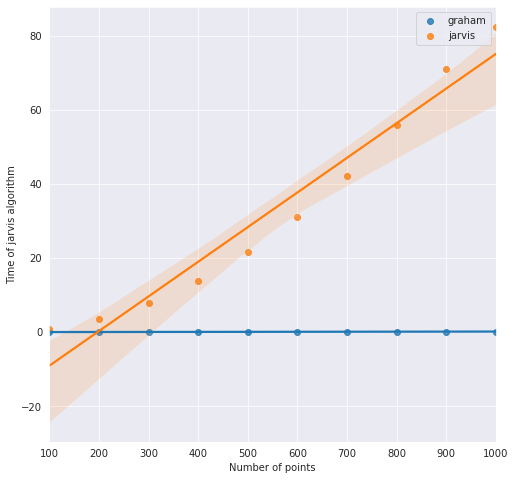

In [73]:
x = 'Number of points'
y_1 = 'Time of graham algorithm'
y_2 = 'Time of jarvis algorithm'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_b, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_b, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**c)**

In [74]:
def time_comparison_on_rectangle():
    columns = ["Number of points", "vertices", "Time of graham algorithm", "Time of jarvis algorithm",
               "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        y_1 = np.random.randint(-50, 40)
        y_2 = np.random.randint(-50, 40)
        vertices = [(x_1, y_1), (x_1, y_2), (x_2, y_1), (x_2, y_2)]
        num_of_points = i * 100
        new_data = random_points_on_the_rectangle(num_of_points, vertices)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, vertices, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [75]:
time_comparison_df_c = time_comparison_on_rectangle()
time_comparison_df_c

,Number of points,vertices,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,100,"[(-16, -13), (-16, 0), (-6, -13), (-6, 0)]",0.013435,0.076211,graham_algorithm,0.062776
1,200,"[(-22, -27), (-22, -21), (19, -27), (19, -21)]",0.028830,0.153986,graham_algorithm,0.125157
2,300,"[(11, -18), (11, -24), (-6, -18), (-6, -24)]",0.045078,0.239216,graham_algorithm,0.194138
3,400,"[(28, -24), (28, -38), (3, -24), (3, -38)]",0.057081,0.306074,graham_algorithm,0.248992
4,500,"[(-22, -4), (-22, 18), (14, -4), (14, 18)]",0.066339,0.397305,graham_algorithm,0.330965
5,600,"[(-6, 35), (-6, 27), (-28, 35), (-28, 27)]",0.098918,0.467737,graham_algorithm,0.368818
6,700,"[(4, 6), (4, 28), (-1, 6), (-1, 28)]",0.098550,0.554238,graham_algorithm,0.455688
7,800,"[(39, 31), (39, 39), (-37, 31), (-37, 39)]",0.125651,0.630497,graham_algorithm,0.504846
8,900,"[(13, -38), (13, -24), (5, -38), (5, -24)]",0.134644,0.718524,graham_algorithm,0.583880
9,1000,"[(4, 18), (4, -7), (-47, 18), (-47, -7)]",0.150661,0.797021,graham_algorithm,0.646360


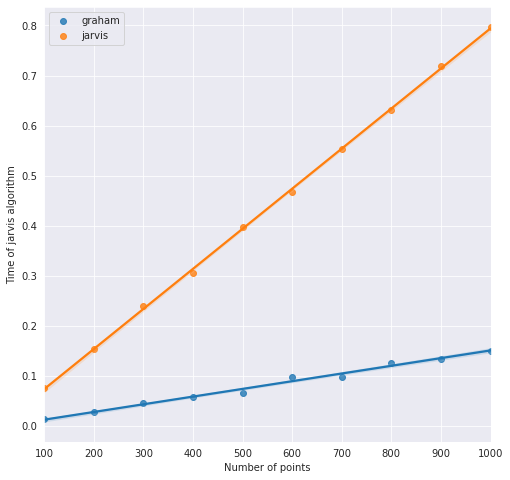

In [76]:
x = 'Number of points'
y_1 = 'Time of graham algorithm'
y_2 = 'Time of jarvis algorithm'
plt.figure(figsize=(8,8))
sns.regplot(data=time_comparison_df_c, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_c, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")

**d)**

In [77]:
def time_comparison_on_square():
    columns = ["Side number of points", "Diagonal number of points", "vertices", "Time of graham algorithm",
               "Time of jarvis algorithm", "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        side = abs(x_2 - x_1)
        y = np.random.randint(-50, 40)
        vertices = [(x_1, y), (x_2, y), (x_1, y + side), (x_2, y + side)]
        side_num_of_points = i * 75
        diag_num_of_points = i * 25
        new_data = random_points_on_square(vertices, side_num_of_points, diag_num_of_points)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((side_num_of_points, diag_num_of_points, vertices, graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [78]:
time_comparison_df_d = time_comparison_on_square()
time_comparison_df_d

,Side number of points,Diagonal number of points,vertices,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,75,25,"[(-17, -47), (18, -47), (-17, -12), (18, -12)]",0.013541,0.056328,graham_algorithm,0.042787
1,150,50,"[(-35, 11), (4, 11), (-35, 50), (4, 50)]",0.026134,0.090966,graham_algorithm,0.064832
2,225,75,"[(22, -34), (10, -34), (22, -22), (10, -22)]",0.042665,0.137335,graham_algorithm,0.094670
3,300,100,"[(-16, 11), (-27, 11), (-16, 22), (-27, 22)]",0.051499,0.233135,graham_algorithm,0.181637
4,375,125,"[(33, -31), (-20, -31), (33, 22), (-20, 22)]",0.074234,0.295456,graham_algorithm,0.221222
5,450,150,"[(-40, -9), (-1, -9), (-40, 30), (-1, 30)]",0.088507,0.348871,graham_algorithm,0.260364
6,525,175,"[(23, -20), (1, -20), (23, 2), (1, 2)]",0.104139,0.407126,graham_algorithm,0.302987
7,600,200,"[(9, -43), (-4, -43), (9, -30), (-4, -30)]",0.114820,0.467443,graham_algorithm,0.352623
8,675,225,"[(-16, -5), (-42, -5), (-16, 21), (-42, 21)]",0.135761,0.453249,graham_algorithm,0.317489
9,750,250,"[(26, 34), (25, 34), (26, 35), (25, 35)]",0.154770,0.500199,graham_algorithm,0.345429


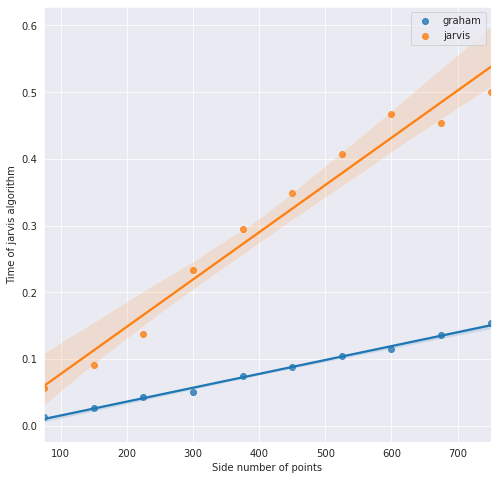

In [79]:
x = 'Side number of points'
y_1 = 'Time of graham algorithm'
y_2 = 'Time of jarvis algorithm'
plt.figure(figsize=(8,8))
ax = sns.regplot(data=time_comparison_df_d, x=x, y=y_1, label='graham')
sns.regplot(data=time_comparison_df_d, x=x, y=y_2, label='jarvis')
plt.legend(loc="best")